In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# CIFAR-10 데이터셋 불러오기 및 전처리
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 데이터 정규화

# 레이블을 one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구성
model = models.Sequential()

# 첫 번째 합성곱 층
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 두 번째 합성곱 층
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 세 번째 합성곱 층
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 완전 연결 층을 위해 Flatten 층 추가
model.add(layers.Flatten())

# Dense 층 추가
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 모델 요약 출력
model.summary()

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# 테스트 데이터로 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n테스트 정확도: {test_acc}")


170498071/170498071 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                       

In [2]:
# 모델 구성
model = models.Sequential()

# 첫 번째 합성곱 층과 MaxPooling 층
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout 층 추가

# 두 번째 합성곱 층과 MaxPooling 층
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout 층 추가

# 세 번째 합성곱 층
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 완전 연결 층을 위해 Flatten 층 추가
model.add(layers.Flatten())

# Dense 층 추가 -> DropOut 층 이
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout 층 추가
model.add(layers.Dense(10, activation='softmax'))

# 모델 요약 출력
model.summary()

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train, y_train, epochs=50, batch_size=64,
                    validation_data=(x_test, y_test))

# 테스트 데이터로 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n테스트 정확도: {test_acc}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)         

In [5]:
# MLP 모델 구성
mlp_model = models.Sequential()
mlp_model.add(layers.Flatten(input_shape=(32, 32, 3)))
mlp_model.add(layers.Dense(512, activation='relu'))
mlp_model.add(layers.Dense(512, activation='relu'))
mlp_model.add(layers.Dense(10, activation='softmax'))

# 모델 요약 출력
mlp_model.summary()

# 모델 컴파일
mlp_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# 모델 학습
mlp_history = mlp_model.fit(x_train, y_train, epochs=50, batch_size=64,
                            validation_data=(x_test, y_test))

# 테스트 데이터로 모델 평가
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(x_test, y_test, verbose=2)
print(f"\nMLP 테스트 정확도: {mlp_test_acc}")


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               1573376   
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1841162 (7.02 MB)
Trainable params: 1841162 (7.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
782/782 [==============================] - 33s 41ms/step - loss: 1.8624 - accuracy: 0.3303 - val_loss: 1.8428 - val_accuracy: 0.3451
Epoc

313/313 [==============================] - 4s 11ms/step


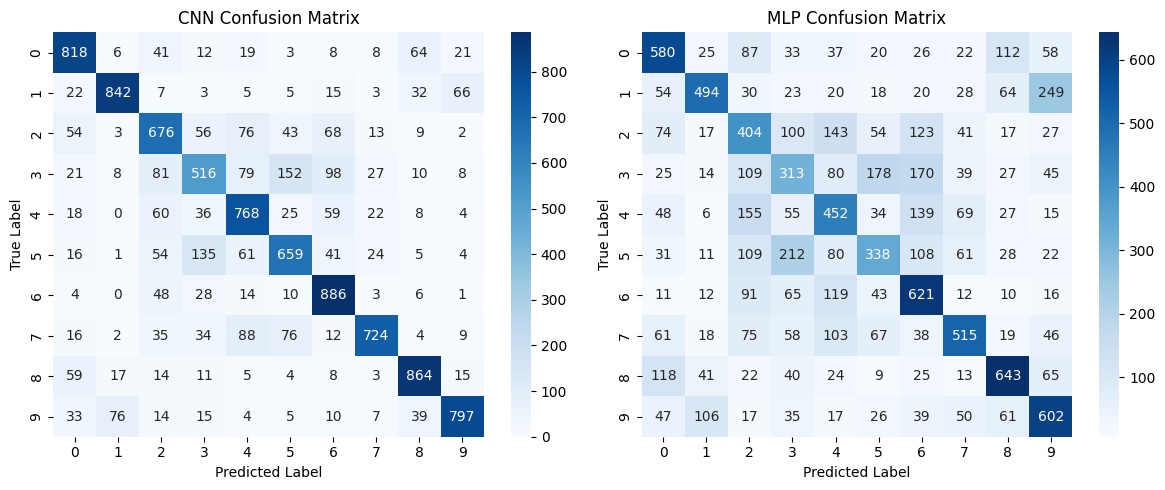

CNN Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1000
           1       0.88      0.84      0.86      1000
           2       0.66      0.68      0.67      1000
           3       0.61      0.52      0.56      1000
           4       0.69      0.77      0.72      1000
           5       0.67      0.66      0.66      1000
           6       0.74      0.89      0.80      1000
           7       0.87      0.72      0.79      1000
           8       0.83      0.86      0.85      1000
           9       0.86      0.80      0.83      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.75     10000
weighted avg       0.76      0.76      0.75     10000

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.58      0.57      1000
           1       0.66      0.49      0.57      1000
           2       0.37 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# CNN 모델 예측값 생성
y_pred_cnn = model.predict(x_test)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
y_true = np.argmax(y_test, axis=1)

# MLP 모델 예측값 생성
y_pred_mlp = mlp_model.predict(x_test)
y_pred_classes_mlp = np.argmax(y_pred_mlp, axis=1)

# Confusion Matrix 생성
conf_matrix_cnn = confusion_matrix(y_true, y_pred_classes_cnn)
conf_matrix_mlp = confusion_matrix(y_true, y_pred_classes_mlp)

# Confusion Matrix 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('MLP Confusion Matrix')

plt.tight_layout()
plt.show()

# Classification Report 출력
print('CNN Classification Report:')
print(classification_report(y_true, y_pred_classes_cnn))

print('MLP Classification Report:')
print(classification_report(y_true, y_pred_classes_mlp))


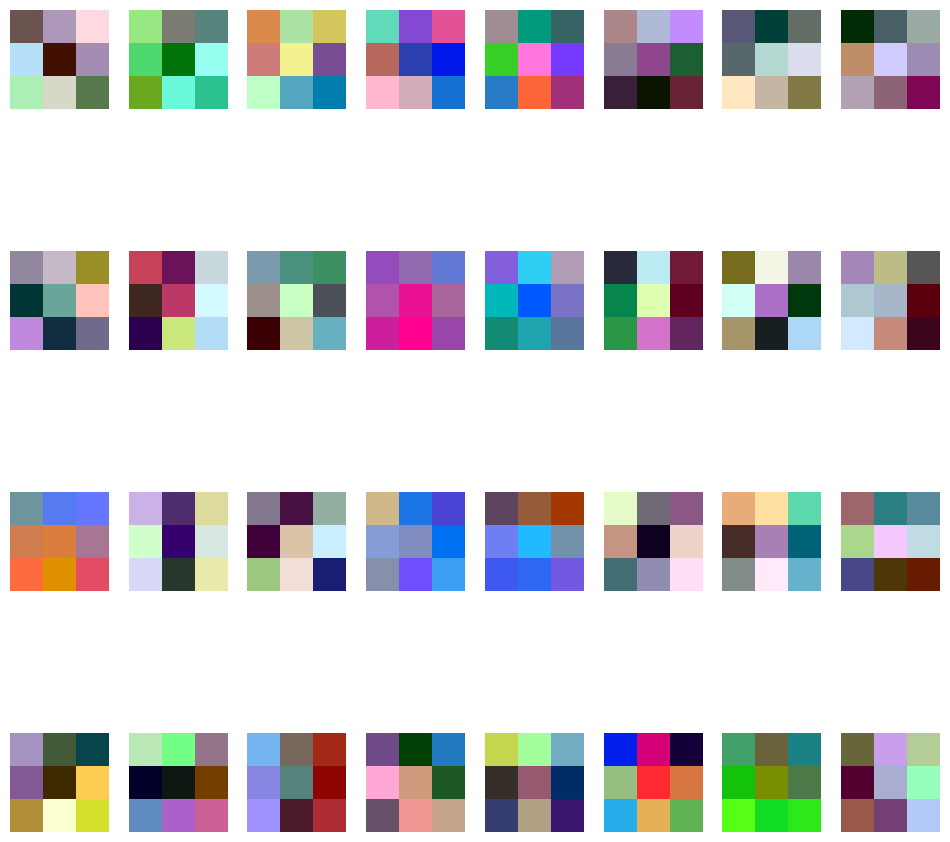

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 첫 번째 합성곱 층의 가중치 가져오기
first_conv_layer = model.layers[0]
filters, biases = first_conv_layer.get_weights()

# 커널 시각화
n_filters = filters.shape[-1]  # 필터의 개수 (보통 32개)
fig, axes = plt.subplots(int(np.ceil(n_filters / 8)), 8, figsize=(12, 12))

for i in range(n_filters):
    row = i // 8
    col = i % 8
    f = filters[:, :, :, i]
    f_min, f_max = np.min(f), np.max(f)
    axes[row, col].imshow((f - f_min) / (f_max - f_min))  # 정규화하여 시각화
    axes[row, col].axis('off')

plt.show()


313/313 [==============================] - 5s 15ms/step


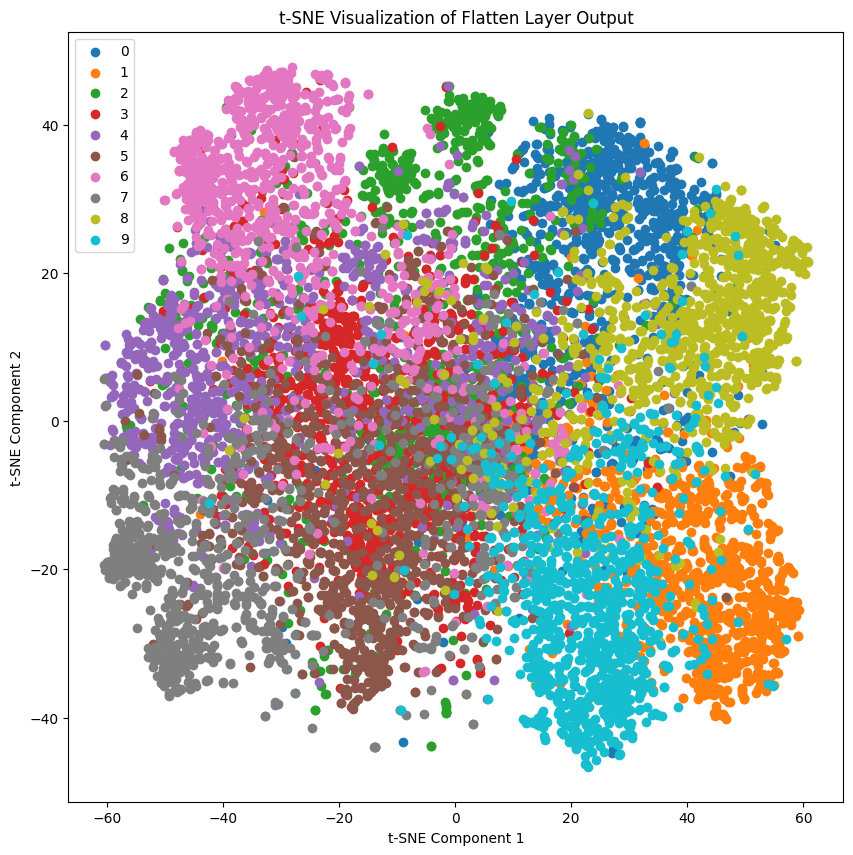

In [9]:
from sklearn.manifold import TSNE

# Flatten 층까지의 모델 구성
flatten_model = models.Model(inputs=model.input, outputs=model.get_layer(index=-3).output)

# Flatten 층의 출력값 추출
flatten_output = flatten_model.predict(x_test)

# t-SNE로 2D 공간에 시각화
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(flatten_output)

# 클래스별로 색상을 다르게 하여 시각화
plt.figure(figsize=(10, 10))
for i in range(10):
    indices = np.where(np.argmax(y_test, axis=1) == i)
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=str(i))

plt.legend()
plt.title('t-SNE Visualization of Flatten Layer Output')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
